In [3]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import math
# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar
from matplotlib import pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from tqdm import tqdm_notebook
from pmdarima.arima import auto_arima

from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [4]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,
-119.399,35.9432,0.0,-3.9303,0.280780,-3.233600,-5.7440,-5.50000,-7.94840,-10.4080,-14.510000,-15.4360,...,-70.71900,-70.99500,-71.0770,-70.72700,-71.58400,-70.38500,-69.126000,-69.34900,-70.15600,-69.73900
-119.397,35.9112,0.0,-4.6589,0.111660,-2.744800,-5.3239,-4.15060,-6.79580,-8.6716,-11.721000,-12.1090,...,-65.73100,-66.10100,-65.9380,-65.60700,-66.53000,-66.10300,-64.730000,-64.98500,-66.20600,-65.96200
-119.395,35.9952,0.0,-3.7818,0.160600,-4.459100,-7.8328,-8.10910,-10.80000,-12.4170,-16.437000,-18.1350,...,-90.31100,-90.10100,-90.2760,-90.09200,-91.19800,-90.04400,-89.133000,-89.65000,-90.54100,-90.25500
-119.389,35.9312,0.0,-4.2370,-0.222130,-3.599800,-6.4258,-6.13860,-8.45320,-11.0480,-14.631000,-15.8320,...,-75.12400,-75.61300,-75.6320,-75.41800,-76.37100,-75.49600,-74.290000,-74.54800,-75.68200,-75.31000
-119.381,35.9192,0.0,-4.3680,-0.222480,-3.329300,-5.8733,-5.07140,-7.60330,-10.0670,-13.188000,-14.1600,...,-74.05400,-74.58000,-74.4370,-74.24900,-75.19600,-74.47400,-73.113000,-73.27500,-74.47200,-74.28200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-119.113,35.4610,0.0,-3.8662,0.504940,0.021559,-1.4317,-0.97025,-1.66280,-3.7230,-1.452300,-3.0993,...,-3.95030,-3.04970,-3.8032,-4.08910,-3.80460,-4.39900,-3.536100,-0.10914,-2.93400,-3.15110
-119.111,35.4290,0.0,-4.1221,0.625200,0.010918,-1.1163,-0.50608,-0.90184,-2.6844,0.028226,-1.6976,...,1.75070,2.51770,2.1738,1.91470,1.97470,1.44110,2.329900,5.14940,2.30590,2.10560
-119.107,35.4810,0.0,-3.7211,0.607290,0.026638,-1.4745,-0.80891,-1.28970,-3.0307,-0.798680,-1.7789,...,-4.06480,-3.20360,-3.4841,-3.87110,-3.66280,-5.07650,-3.813100,-0.79053,-3.76280,-3.94340


In [5]:
print(df.max())
print(df.min())
print(df.std())
print(df.mean())

2014-11-08    0.0000
2014-12-02    1.3196
2014-12-26    1.5156
2015-02-12    1.6025
2015-03-08   -0.4765
               ...  
2018-12-05    6.4908
2018-12-17    8.1168
2018-12-29    8.8717
2019-01-10    6.4200
2019-01-22    6.8942
Length: 110, dtype: float64
2014-11-08     0.0000
2014-12-02    -5.5521
2014-12-26    -0.8963
2015-02-12    -4.4591
2015-03-08    -7.8328
               ...   
2018-12-05   -90.0440
2018-12-17   -89.1330
2018-12-29   -89.6500
2019-01-10   -90.5410
2019-01-22   -90.2550
Length: 110, dtype: float64
2014-11-08     0.000000
2014-12-02     1.842493
2014-12-26     0.544435
2015-02-12     1.490307
2015-03-08     1.550672
                ...    
2018-12-05    28.507263
2018-12-17    28.677782
2018-12-29    29.489282
2019-01-10    28.883794
2019-01-22    28.745984
Length: 110, dtype: float64
2014-11-08     0.000000
2014-12-02    -3.350044
2014-12-26     0.194340
2015-02-12    -0.511927
2015-03-08    -2.440023
                ...    
2018-12-05   -23.297258
2018-12-17 

In [6]:
#tup=(-119.9588,35.185)
tup=(-119.2990,35.8852)
#tup=(-120.2888,34.8349)
#tup=(-117.6414,37.6236)
data=df[df.index==tup].copy()
data

,,2014-11-08,2014-12-02,2014-12-26,2015-02-12,2015-03-08,2015-04-01,2015-04-25,2015-05-19,2015-06-12,2015-07-06,...,2018-10-18,2018-10-30,2018-11-11,2018-11-17,2018-11-23,2018-12-05,2018-12-17,2018-12-29,2019-01-10,2019-01-22
Longitude,Latitude,,,,,,,,,,,,,,,,,,,,,


In [7]:
data=data.drop(columns=data.columns[0:3],axis=1)

data=data.drop(columns=data.columns[105:108],axis=1)

In [8]:
data=data.transpose()

data = data.set_axis(['data'], axis=1, inplace=False)
#data.insert(0,"date",value=data.index)
data=data.reset_index()
data.rename(columns={'index':'date'}, inplace=True)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 1 elements

In [ ]:

data.data.values[np.isnan(data.data.values)] = -2.5
data.data.values
#test=data.data.values.to_numpy().flatten() 
#test

array([ -1.0144,  -2.3654,  -1.4554,  -3.7235,  -5.9177,  -8.6802,
       -10.197 , -12.65  , -13.964 , -18.866 , -19.187 , -16.228 ,
       -18.009 , -17.598 , -15.276 , -19.944 , -16.841 , -16.195 ,
       -17.484 , -20.244 , -18.558 , -17.708 , -16.546 , -21.239 ,
       -20.441 , -21.363 , -23.978 , -22.541 , -25.949 , -30.371 ,
       -28.523 , -32.686 , -32.802 , -32.893 , -32.783 , -35.792 ,
       -34.137 , -34.052 , -31.777 , -33.172 , -32.468 , -32.229 ,
       -33.75  , -33.991 , -33.366 , -33.587 , -32.262 , -32.95  ,
       -33.12  , -31.442 , -33.979 , -35.032 , -32.489 , -33.341 ,
       -34.41  , -34.917 , -37.085 , -39.217 , -39.133 , -40.398 ,
       -40.872 , -42.649 , -40.423 , -38.534 , -41.152 , -42.975 ,
       -42.493 , -44.2   , -45.455 , -42.644 , -41.945 , -44.077 ,
       -43.351 , -43.316 , -42.356 , -41.954 , -43.689 , -43.846 ,
       -43.292 , -40.974 , -42.672 , -45.966 , -41.902 , -45.271 ,
       -43.345 , -46.303 , -46.266 , -49.379 , -48.562 , -49.4

In [ ]:
result = adfuller(data.data.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

#It calculates the p-value and 
# compares it with a threshold value or significance level of 0.05. 
# If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.
##p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -1.9936082147915322
n_lags: 0.28938268762236286
p-value: 0.28938268762236286
Critial Values:
   1%, -3.497501033
Critial Values:
   5%, -2.89090644
Critial Values:
   10%, -2.5824349


**p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.**
Data is stationary so can proceed with ARIMA or ARMA.

In [ ]:
data3=data.resample("M", on="date").agg('mean').dropna().reset_index(drop=False)
data3

,date,data
0,2015-02-28,-1.014400
1,2015-03-31,-2.365400
2,2015-04-30,-2.589450
3,2015-05-31,-5.917700
4,2015-06-30,-8.680200
5,2015-07-31,-11.423500
6,2015-08-31,-13.964000
7,2015-09-30,-18.866000
8,2015-10-31,-19.187000
9,2015-11-30,-17.118500


Run ETS Decomposition on data (To check the seasonality in data)

In [ ]:
result=seasonal_decompose(data3.data, model='additive', period=12)

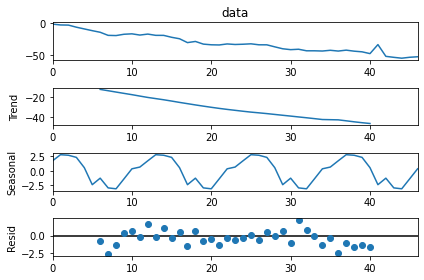

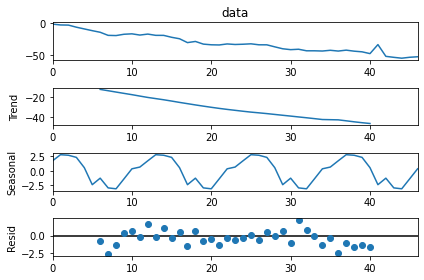

In [ ]:
result.plot()

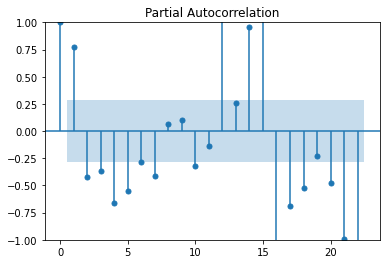

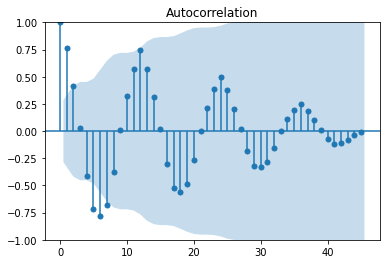

In [ ]:
plot_pacf(result.seasonal,lags=22);
plt.show()
plot_acf(result.seasonal,lags=45);

In [ ]:

df_train=data3.iloc[:32, :].copy()
df_test=data3.iloc[32:,].copy()
print("df_train: ",df_train)
print("df_test: ",df_test)

df_train:           date       data
0  2015-02-28  -1.014400
1  2015-03-31  -2.365400
2  2015-04-30  -2.589450
3  2015-05-31  -5.917700
4  2015-06-30  -8.680200
5  2015-07-31 -11.423500
6  2015-08-31 -13.964000
7  2015-09-30 -18.866000
8  2015-10-31 -19.187000
9  2015-11-30 -17.118500
10 2015-12-31 -16.437000
11 2016-01-31 -18.392500
12 2016-02-29 -16.839500
13 2016-03-31 -18.836667
14 2016-04-30 -18.892500
15 2016-05-31 -21.927333
16 2016-06-30 -24.245000
17 2016-07-31 -30.371000
18 2016-08-31 -28.523000
19 2016-09-30 -32.744000
20 2016-10-31 -33.822667
21 2016-11-30 -34.094500
22 2016-12-31 -32.472333
23 2017-01-31 -33.334000
24 2017-02-28 -32.933000
25 2017-03-31 -32.281000
26 2017-04-30 -33.833333
27 2017-05-31 -33.875500
28 2017-06-30 -37.073000
29 2017-07-31 -40.134333
30 2017-08-31 -41.536000
31 2017-09-30 -40.887000
df_test:           date       data
32 2017-10-31 -43.346500
33 2017-11-30 -43.348000
34 2017-12-31 -43.714000
35 2018-01-31 -42.542000
36 2018-02-28 -43.767500
37 2

In [ ]:
model = auto_arima(data3.data.values, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=253.801, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=259.824, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=253.359, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=252.408, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=261.501, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=254.402, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=255.891, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=260.071, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.386 seconds


In [ ]:
model=ARIMA(df_train.data.values, order=(0,1,1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -70.260
Date:                Tue, 02 Aug 2022   AIC                            144.520
Time:                        15:17:39   BIC                            147.388
Sample:                             0   HQIC                           145.454
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1567      0.179      0.877      0.380      -0.193       0.507
sigma2         5.4423      1.415      3.846      0.000       2.669       8.216
Ljung-Box (L1) (Q):                   1.44   Jarque-

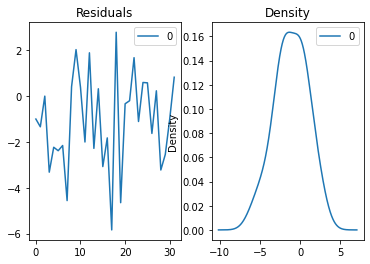

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

what are residuals??


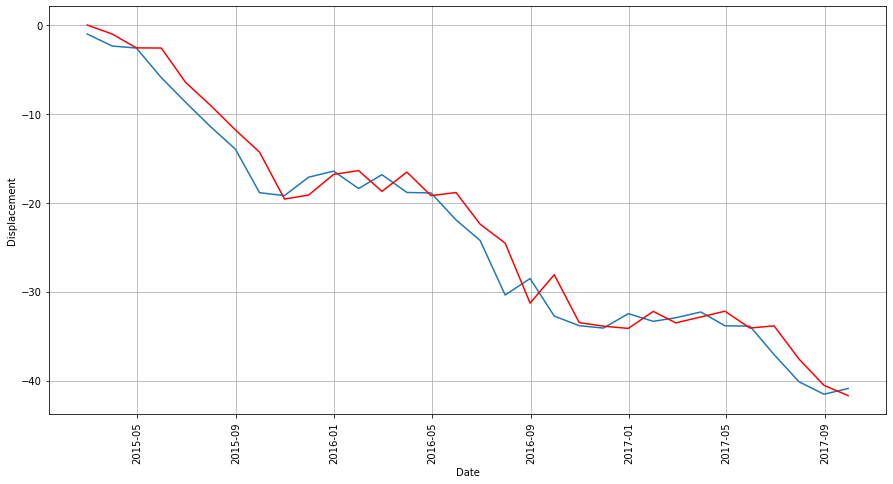

In [ ]:
results = model.fit()

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure

#plt.title('-119.9588,35.185')
plt.ylabel('Displacement')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)



plt.plot(df_train.date.values,df_train.data.values )
plt.plot(df_train.date.values, results.fittedvalues, color='red')
plt.show()

In [ ]:
MSE_error = mean_squared_error(df_train.data.values, results.fittedvalues)
print('Testing Mean Squared Error is {}'.format(MSE_error))
 #df_train.data.values

Testing Mean Squared Error is 5.3058021003399745


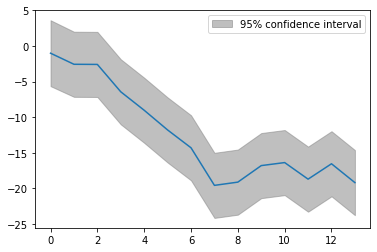

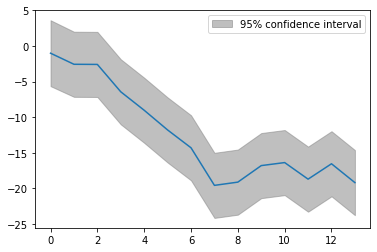

In [ ]:

plot_predict(results,1,14)

In [ ]:

##training_data = train_data['Close'].values
#test_data = test_data['Close'].values
history = [x for x in df_train.data.values]
model_predictions = []
N_test_observations = len(df_test.data.values)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = df_test.data.values[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(df_test.data.values, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
rmse = math.sqrt(MSE_error)
print('Test RMSE: %.3f' % rmse)

Testing Mean Squared Error is 42.88015499314732
Test RMSE: 6.548


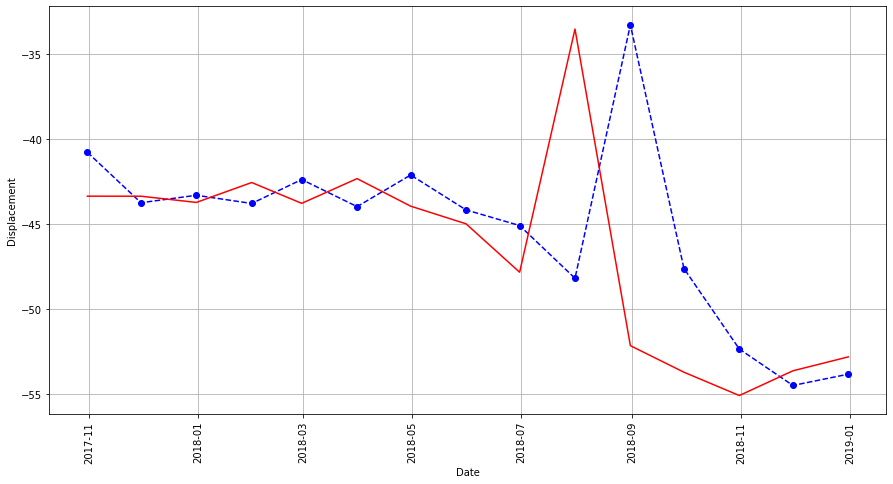

In [ ]:

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure

#plt.title('-119.9588,35.185')
plt.ylabel('Displacement')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)


#plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
#plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.plot(df_test.date.values, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Displacement')
plt.plot(df_test.date.values, df_test.data, color='red', label='Actual Displacement')
#plt.plot(df_train.date.values,df_train.data.values )
#plt.plot(df_train.date.values, results.fittedvalues, color='red')
plt.show()

In [ ]:
print(len( model_predictions)-len( df_test.data))

0


next step is to run arimax, and create a better visualization for this prediction.

precipitation and ground water